In [22]:
!pip3.11 install mss opencv-python numpy pillow pygetwindow imageio

  Obtaining dependency information for imageio from https://files.pythonhosted.org/packages/cb/bd/b394387b598ed84d8d0fa90611a90bee0adc2021820ad5729f7ced74a8e2/imageio-2.37.0-py3-none-any.whl.metadata
  Using cached imageio-2.37.0-py3-none-any.whl.metadata (5.2 kB)
Using cached imageio-2.37.0-py3-none-any.whl (315 kB)



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pygetwindow as gw
def set_window_size(window_title, width, height):
    windows = gw.getWindowsWithTitle(window_title)
    if not windows:
        raise Exception(f"{window_title} window not found! Make sure it's running and visible.")
    
    window = windows[0]
    if window.isMinimized:
        window.restore()
    
    window.resizeTo(width, height)

set_window_size("Dolphin scripting-preview2-4802-dirty |", 854, 504)

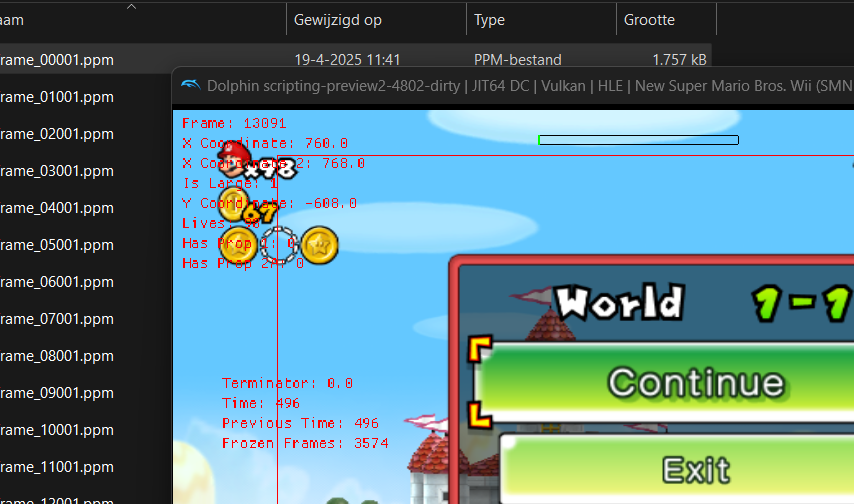

In [8]:

import mss
import numpy as np
import cv2
from PIL import Image as PILImage
from IPython.display import Image, display
import io

# Find the Dolphin window by title
windows = gw.getWindowsWithTitle("Dolphin scripting-preview2-4802-dirty |")  # case-sensitive
if not windows:
    raise Exception("Dolphin window not found! Make sure it's running and visible.")

dolphin_window = windows[0]
if dolphin_window.isMinimized:
    dolphin_window.restore()

# Get the bounding box
left, top, width, height = dolphin_window.left, dolphin_window.top, dolphin_window.width, dolphin_window.height
monitor = {"top": top, "left": left, "width": width, "height": height}

# Capture the Dolphin window
with mss.mss() as sct:
    screenshot = sct.grab(monitor)
    frame = np.array(screenshot)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGRA2RGB)

# Display the captured frame in the notebook
pil_img = PILImage.fromarray(frame_rgb)
with io.BytesIO() as buf:
    pil_img.save(buf, format='PNG')
    display(Image(data=buf.getvalue()))


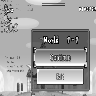

Red box not found!


In [9]:
import pygetwindow as gw
import mss
import numpy as np
import cv2
from PIL import Image as PILImage
from IPython.display import display, clear_output
import io
import time

# --- Step 1: Find Dolphin window ---
windows = gw.getWindowsWithTitle("Dolphin scripting-preview2-4802-dirty |")
if not windows:
    raise Exception("Dolphin window not found!")
dolphin_window = windows[0]
if dolphin_window.isMinimized:
    dolphin_window.restore()

monitor = {
    "top": dolphin_window.top,
    "left": dolphin_window.left,
    "width": dolphin_window.width,
    "height": dolphin_window.height
}

# --- Step 2: Live capture loop with red box cropping ---
duration = 60  # seconds
start_time = time.time()

with mss.mss() as sct:
    while time.time() - start_time < duration:
        frame = np.array(sct.grab(monitor))  # BGRA format

        # --- Red box detection ---
        red_color = np.array([0, 0, 255, 255], dtype=np.uint8)
        mask = np.all(frame == red_color, axis=-1).astype(np.uint8)
        coords = np.argwhere(mask)

        if coords.size == 0:
            print("Red box not found!")
            break

        y0, x0 = coords.min(axis=0)
        y1, x1 = coords.max(axis=0) + 1

        # Optional: exclude red border
        margin = 1
        cropped = frame[y0+margin:y1-margin, x0+margin:x1-margin, :]

        # Convert and resize for display
        cropped_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGRA2RGB)
        input_s = (96,96)
        resized = cv2.resize(cropped_rgb, input_s)  # Resize if needed
        # convert to black and white
        resized = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
        # Show image in notebook
        pil_img = PILImage.fromarray(resized)
        buf = io.BytesIO()
        pil_img.save(buf, format='PNG')

        clear_output(wait=True)
        display(Image(data=buf.getvalue()))

        # time.sleep(0.01)  # ~20 FPS
